In [91]:
# Required Python Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [92]:
df= pd.read_csv("./data/Processed1DataSet.csv")
df_results = df    #Keep a copy of the original dataset for review of the predictions

In [93]:
df.columns

Index(['Unnamed: 0', 'Year', 'Song Title', 'Local Lyrics Lines',
       'Local Lyrics Single Line', 'Translation', 'Translation Multi Line',
       'Country', 'Composer', 'Lyrics', 'Conductor', 'Contest', 'Round',
       'Semi Final Position', 'Semi Final Points', 'Final Position',
       'Final Points', 'Other Version 1', 'Other Version 2', 'Other Version 3',
       'Other Version 4', 'Other Version 5', 'Other Version 6',
       'Other Version 7', 'Other Version 8', 'Other Version 9',
       'Translation Length'],
      dtype='object')

<h2>Data Prep</h2>

In [94]:
#Create the dummy fields
dummy = pd.get_dummies(df['Country'])
df = pd.concat([df,dummy],axis=1)
df = df.drop('Country', 1)
df = df.fillna(0)

In [95]:
df= df.drop(['Unnamed: 0','Song Title', 'Local Lyrics Lines',
       'Local Lyrics Single Line', 'Translation', 'Translation Multi Line',
       'Composer', 'Lyrics', 'Conductor', 'Contest', 'Round',
       'Semi Final Position', 'Semi Final Points', 
       'Final Points', 'Other Version 1', 'Other Version 2', 'Other Version 3',
       'Other Version 4', 'Other Version 5', 'Other Version 6',
       'Other Version 7', 'Other Version 8', 'Other Version 9'],axis=1)

In [96]:
df2 = df.loc[df['Year']!=2018]
df2018 = df.loc[df['Year']==2018]

In [97]:
#Remove all null final position records
df2 =  df.loc[df['Year']!=2018].loc[df['Final Position'].notnull()] #Remove the entries which didn't make it to the fina
df2 =  df2.loc[df['Final Position']!=0.0] #Remove the entries which didn't make it to the final

In [104]:
features = df2

In [103]:
features.shape

(41, 55)

In [105]:
# Labels are the values we want to predict
labels = np.array(features['Final Position'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Final Position', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [106]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [107]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (939, 55)
Training Labels Shape: (939,)
Testing Features Shape: (313, 55)
Testing Labels Shape: (313,)


<h2>Build the Nural Net</h2>

In [132]:
# New Attempt at Model
from sklearn.neural_network import MLPClassifier
#rf_new = RandomForestRegressor(n_estimators = 1000, criterion = 'mse', max_depth = None, 
#                               min_samples_split = 2, min_samples_leaf = 1)

rf_new = MLPClassifier(hidden_layer_sizes=(500,500,500,500), max_iter=800)


# Train the model on training data
rf_new.fit(train_features, train_labels);
# Use the forest's predict method on the test data
predictions = rf_new.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'points.')
# Calculate mean absolute percentage error (MAPE)

#Quick fix to work with 0 values
mape_err = errors + 1
mape_lab = test_labels + 1
mape = 100 * (mape_err / mape_lab)

#mape = mean_absolute_percentage_error(predictions / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 5.93 points.
Accuracy: 13.4 %.


<h2>Try the 2018 dataset with the model</h2>

In [133]:
#Test the 2018 results
features = df2018
# Labels are the values we want to predict
labels = np.array(features['Final Position'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Final Position', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)
predictions = rf_new.predict(features)

#Join the predictions back to the original dataset 
newdf = pd.DataFrame(data= df_results.loc[df['Year']==2018])
newdf['Prediction']=predictions

results= newdf[['Song Title','Country','Prediction']].sort_values(by=['Prediction'])
results #Lets take a look at the results

,Song Title,Country,Prediction
1476,Mall,Albania,7.0
1510,My Lucky Day,Moldova,7.0
1513,That’s How You Write A a Song,Norway,7.0
1495,Monsters,Finland,7.0
1551,Under The Ladder,Ukraine,7.0
1487,A Matter of Time,Belgium,7.0
1520,"Hvala, ne",Slovenia,7.0
1480,X My Heart,Azerbaijan,7.0
1479,Nobody But You,Austria,7.0
1556,Light Me Up,Poland,7.0


<h2>Graph the 2018 results</h2>

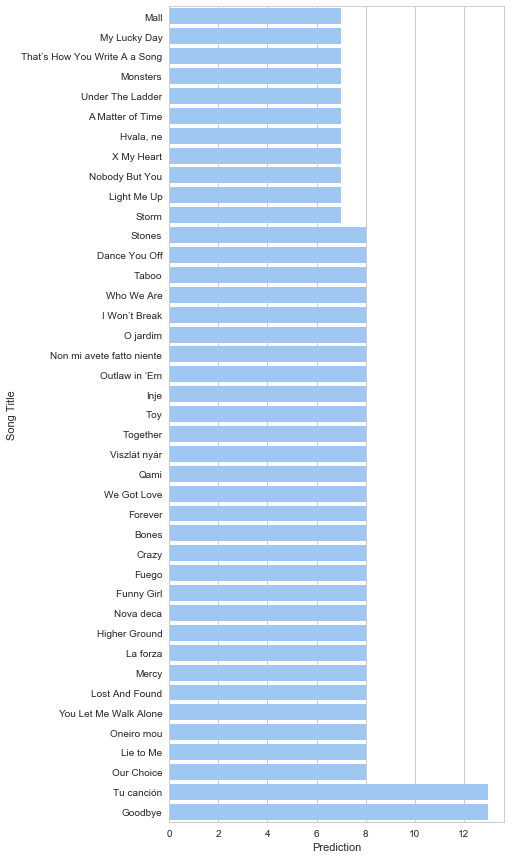

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
# Plot the song positions
sns.set_color_codes("pastel")
sns.barplot(x="Prediction", y="Song Title", data=results,
            label="Prediction", color="b")
